In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


In [63]:
# Configure visualizations
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

# Display all columns in pandas dataframes
pd.set_option('display.max_columns', None)

# Reading the data
train_data = pd.read_csv('Train_Data.csv')
test_data = pd.read_csv('Test_Data.csv')

In [64]:
# Let's first examine our data
print("Training Data Shape:", train_data.shape)
print("\nFeatures in the dataset:")
for column in train_data.columns:
    print(f"{column}: {train_data[column].dtype}")

# Display first few rows
print("\nFirst few rows of training data:")
display(train_data.head())

Training Data Shape: (614, 13)

Features in the dataset:
Loan_ID: object
Gender: object
Married: object
Dependents: object
Education: object
Self_Employed: object
ApplicantIncome: int64
CoapplicantIncome: float64
LoanAmount: float64
Loan_Amount_Term: float64
Credit_History: float64
Property_Area: object
Loan_Status: object

First few rows of training data:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y



Missing values in training data:


,Missing Count,Missing Percentage
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599


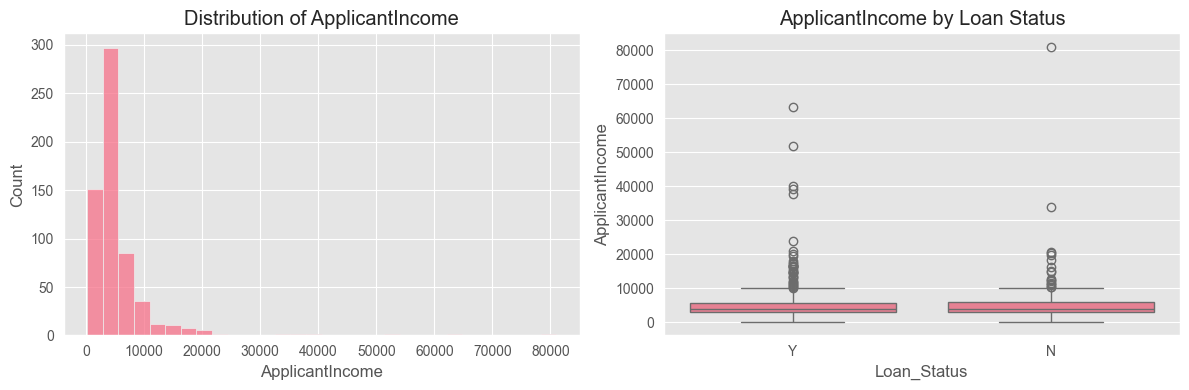


Summary Statistics for ApplicantIncome:
count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


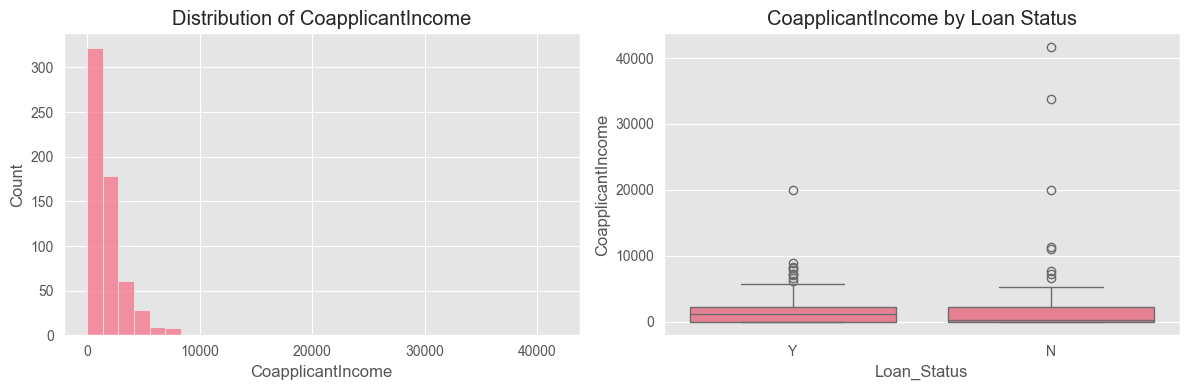


Summary Statistics for CoapplicantIncome:
count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


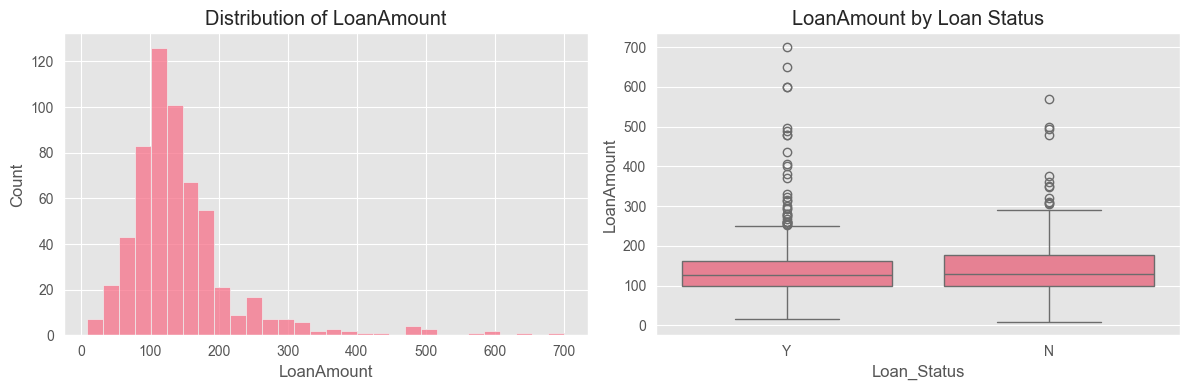


Summary Statistics for LoanAmount:
count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


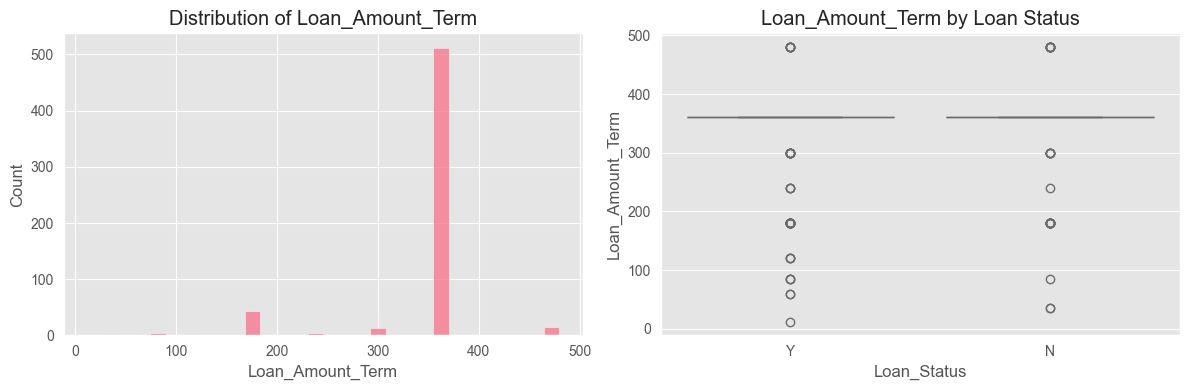


Summary Statistics for Loan_Amount_Term:
count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64


In [65]:
# Check missing values
print("\nMissing values in training data:")
missing_train = train_data.isnull().sum()
missing_percent = (missing_train / len(train_data)) * 100
missing_data = pd.DataFrame({
    'Missing Count': missing_train,
    'Missing Percentage': missing_percent
})
display(missing_data[missing_data['Missing Count'] > 0].sort_values('Missing Count', ascending=False))


# Function for numerical feature analysis
def analyze_numerical_feature(data, feature):
    plt.figure(figsize=(12, 4))

    # Distribution plot
    plt.subplot(1, 2, 1)
    sns.histplot(data=data, x=feature, bins=30)
    plt.title(f'Distribution of {feature}')

    # Box plot with loan status
    plt.subplot(1, 2, 2)
    sns.boxplot(data=data, x='Loan_Status', y=feature)
    plt.title(f'{feature} by Loan Status')

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print(f"\nSummary Statistics for {feature}:")
    print(data[feature].describe())


# Analyze numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
for feature in numerical_features:
    analyze_numerical_feature(train_data, feature)


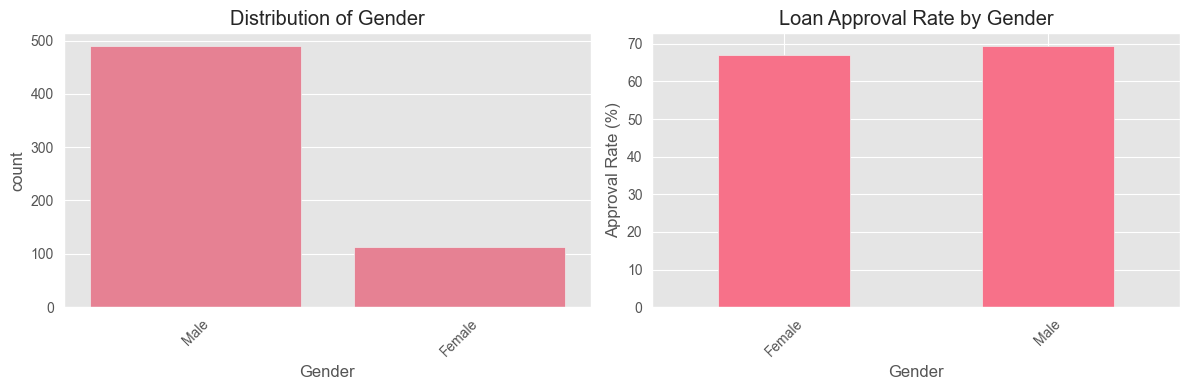


Frequency Distribution for Gender:
Gender
Male      81.364393
Female    18.635607
Name: proportion, dtype: float64


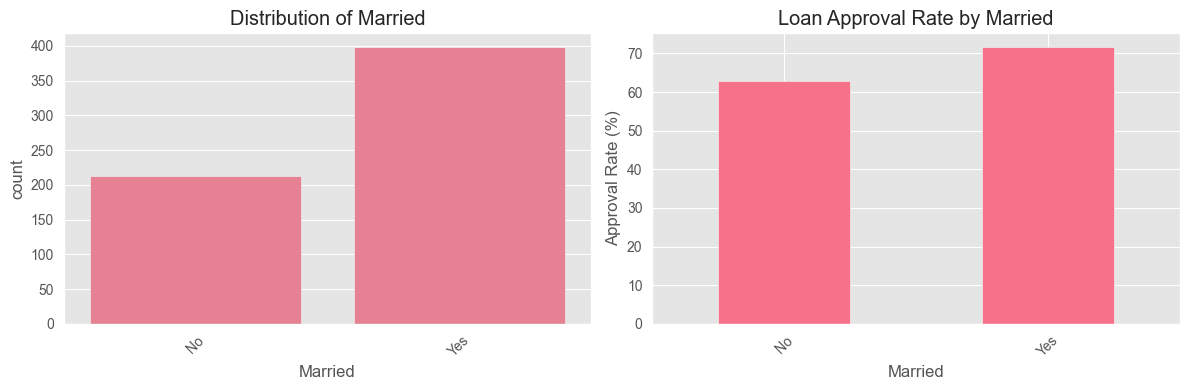


Frequency Distribution for Married:
Married
Yes    65.139116
No     34.860884
Name: proportion, dtype: float64


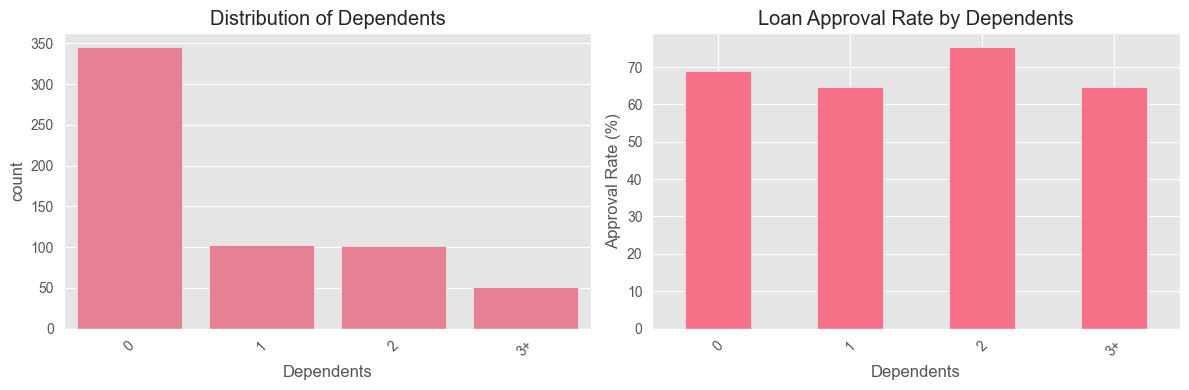


Frequency Distribution for Dependents:
Dependents
0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: proportion, dtype: float64


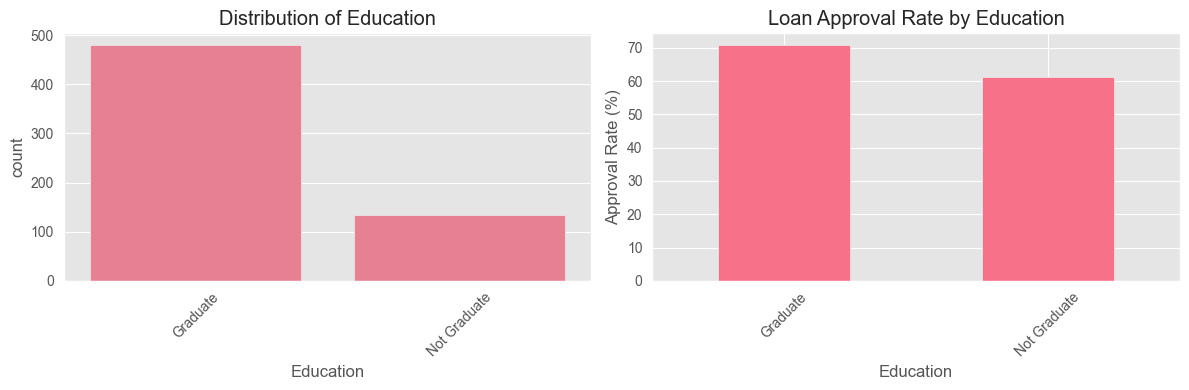


Frequency Distribution for Education:
Education
Graduate        78.175896
Not Graduate    21.824104
Name: proportion, dtype: float64


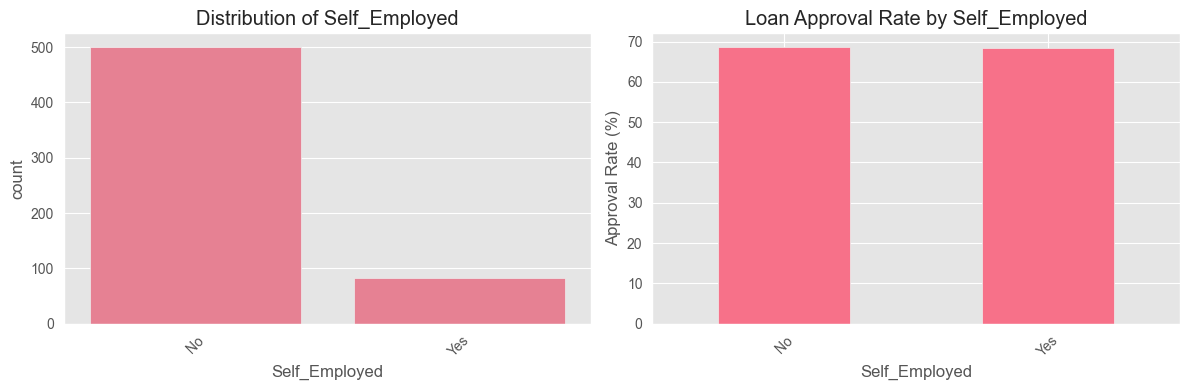


Frequency Distribution for Self_Employed:
Self_Employed
No     85.910653
Yes    14.089347
Name: proportion, dtype: float64


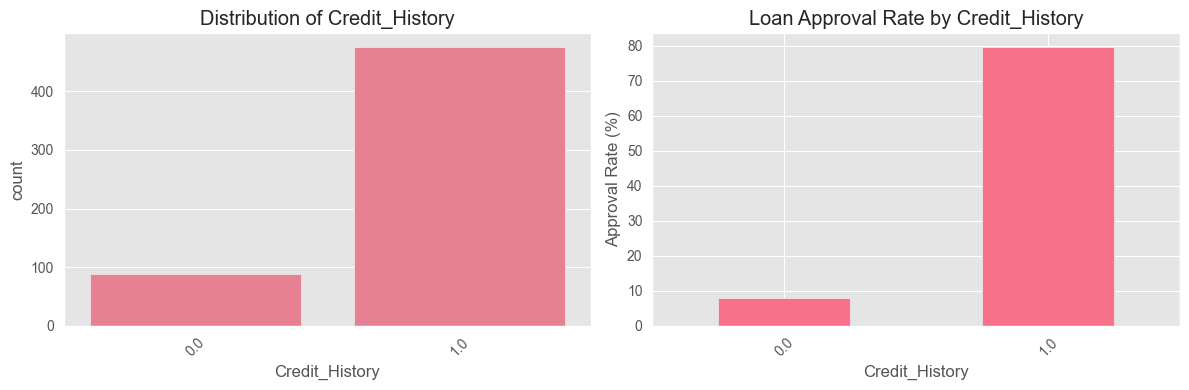


Frequency Distribution for Credit_History:
Credit_History
1.0    84.219858
0.0    15.780142
Name: proportion, dtype: float64


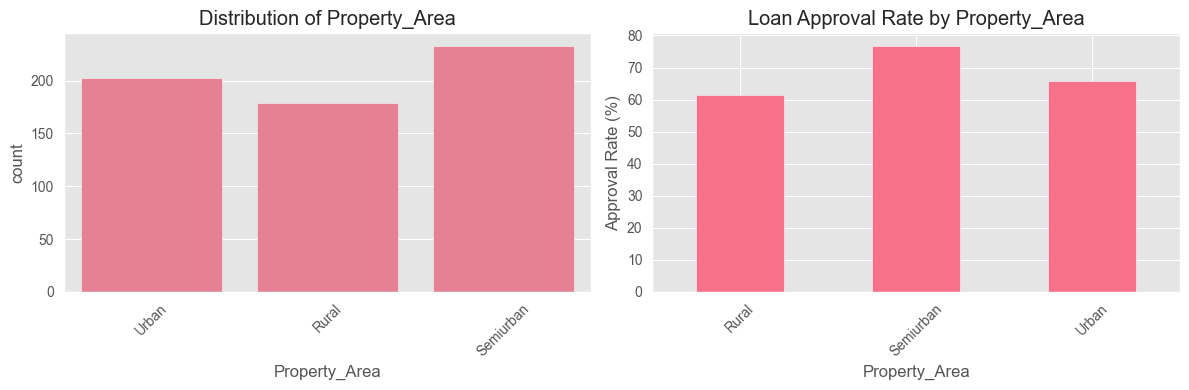


Frequency Distribution for Property_Area:
Property_Area
Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: proportion, dtype: float64


In [66]:
# Function for categorical feature analysis
def analyze_categorical_feature(data, feature):
    plt.figure(figsize=(12, 4))

    # Distribution plot
    plt.subplot(1, 2, 1)
    sns.countplot(data=data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

    # Loan status distribution by category
    plt.subplot(1, 2, 2)
    loan_status_dist = pd.crosstab(data[feature], data['Loan_Status'], normalize='index') * 100
    loan_status_dist['Y'].plot(kind='bar')
    plt.title(f'Loan Approval Rate by {feature}')
    plt.ylabel('Approval Rate (%)')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    # Print frequency distribution
    print(f"\nFrequency Distribution for {feature}:")
    print(data[feature].value_counts(normalize=True) * 100)


# Analyze categorical features
categorical_features = ['Gender', 'Married', 'Dependents', 'Education',
                        'Self_Employed', 'Credit_History', 'Property_Area']
for feature in categorical_features:
    analyze_categorical_feature(train_data, feature)


In [67]:
def handle_missing_values(data):
    """
    Handles missing values in the loan prediction dataset with appropriate safeguards
    for mode calculation.
    """
    # Create a copy of the dataframe to avoid modifying the original
    df = data.copy()

    # Create missing indicator flags for important features
    for column in ['Credit_History', 'Self_Employed', 'LoanAmount']:
        df[f'{column}_Missing'] = df[column].isnull().astype(int)

    # Handle Credit History with special consideration
    credit_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                       'Loan_Amount_Term', 'Education', 'Property_Area']
    credit_model = RandomForestRegressor(n_estimators=100, random_state=42)

    credit_known = df[df['Credit_History'].notna()]
    credit_model.fit(
        pd.get_dummies(credit_known[credit_features], drop_first=True),
        credit_known['Credit_History']
    )

    credit_missing = df[df['Credit_History'].isna()]
    if len(credit_missing) > 0:
        df.loc[credit_missing.index, 'Credit_History'] = credit_model.predict(
            pd.get_dummies(credit_missing[credit_features], drop_first=True)
        )

    # Handle Self_Employed using conditional mode imputation
    for edu in df['Education'].unique():
        mask = (df['Education'] == edu) & (df['Self_Employed'].isna())
        edu_group = df[df['Education'] == edu]['Self_Employed']
        if not edu_group.empty and edu_group.notna().any():
            mode_value = edu_group.mode().iloc[0]  # Using iloc[0] is safer than [0]
            df.loc[mask, 'Self_Employed'] = mode_value

    # Handle Dependents with consideration of marital status
    for marital in df['Married'].unique():
        mask = (df['Married'] == marital) & (df['Dependents'].isna())
        marital_group = df[df['Married'] == marital]['Dependents']
        if not marital_group.empty and marital_group.notna().any():
            mode_value = marital_group.mode().iloc[0]  # Using iloc[0] instead of [0]
            df.loc[mask, 'Dependents'] = mode_value

    # Handle Loan Amount Term with median
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

    # Handle Gender using demographic-aware imputation
    for (edu, marital) in df.groupby(['Education', 'Married']).groups.keys():
        mask = (df['Education'] == edu) & (df['Married'] == marital) & (df['Gender'].isna())
        group_data = df[(df['Education'] == edu) & (df['Married'] == marital)]['Gender']
        if not group_data.empty and group_data.notna().any():
            mode_value = group_data.mode().iloc[0]  # Using iloc[0] instead of [0]
            df.loc[mask, 'Gender'] = mode_value

    # Handle Married with simple mode
    if df['Married'].notna().any():
        df['Married'].fillna(df['Married'].mode().iloc[0])

    # Final check for any remaining missing values
    remaining_nulls = df.isnull().sum()
    if remaining_nulls.any():
        # Fill any remaining missing values with forward fill
        df.ffill(inplace=True)

    return df

In [68]:
# Create feature engineering function
def engineer_features(data):
    # Create a copy of the data
    df = data.copy()

    # Total Income
    df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

    # Log transformation of income features
    df['Log_Total_Income'] = np.log(df['Total_Income'] + 1)
    df['Log_ApplicantIncome'] = np.log(df['ApplicantIncome'] + 1)
    df['Log_CoapplicantIncome'] = np.log(df['CoapplicantIncome'] + 1)
    df['Log_LoanAmount'] = np.log(df['LoanAmount'] + 1)

    # Income to Loan Ratio
    df['Income_to_Loan_Ratio'] = df['Total_Income'] / df['LoanAmount']

    # EMI (Estimated Monthly Installment)
    # Assuming interest rate of 10% per annum
    df['EMI'] = (df['LoanAmount'] * 1000 * 0.1) / 12

    # Balance Income after EMI
    df['Balance_Income'] = df['Total_Income'] - df['EMI']

    return df


In [69]:
# Apply feature engineering and missing value handling
train_processed = handle_missing_values(train_data)
train_processed = engineer_features(train_processed)

In [70]:
def encode_categorical_variables(data):
    """
    Encodes categorical variables in the loan prediction dataset using consistent rules
    that can be replicated across training and testing data without sharing state.
    """
    df = data.copy()

    # For binary variables, we can use a consistent mapping based on alphabetical order
    # This ensures 'Female' always becomes 0 and 'Male' always becomes 1, etc.
    binary_features = ['Gender', 'Married', 'Self_Employed']
    for feature in binary_features:
        # Create consistent mapping based on sorted unique values
        unique_vals = sorted(df[feature].unique())
        mapping = {val: idx for idx, val in enumerate(unique_vals)}
        df[feature] = df[feature].map(mapping)
        print(f"{feature} encoding mapping: {mapping}")

    # For Dependents, use a straightforward numeric conversion
    df['Dependents'] = df['Dependents'].replace('3+', '3')
    df['Dependents'] = pd.to_numeric(df['Dependents'])

    # One-hot encoding will naturally be consistent as long as we use the same
    # drop_first parameter in both training and testing
    nominal_features = ['Education', 'Property_Area']
    df = pd.get_dummies(df, columns=nominal_features, drop_first=True)

    return df


Dependents Distribution Before Processing:
Dependents
0     359
1     102
2     102
3+     51
Name: count, dtype: int64

Dependents Distribution After Processing:
Dependents
0    359
1    102
2    102
3     51
Name: count, dtype: int64

Number of applications with 3+ dependents: 51
Removed Loan_ID column
Encoded Loan_Status using mapping: {'Y': 1, 'N': 0}

Outlier Analysis and Handling for Financial Features:

ApplicantIncome:
Number of outliers: 50
Percentage of outliers: 8.14%


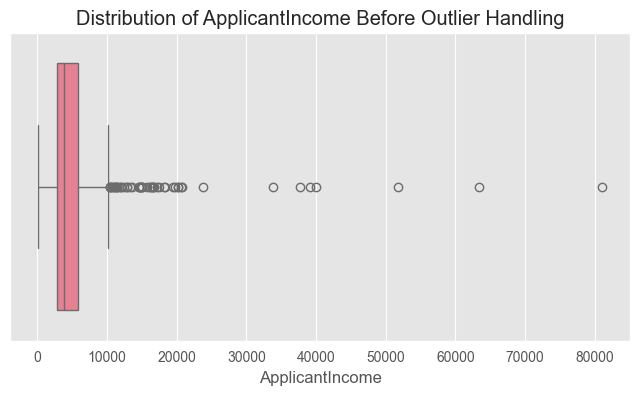

Capped ApplicantIncome outliers to range: [-1498.75, 10171.25]


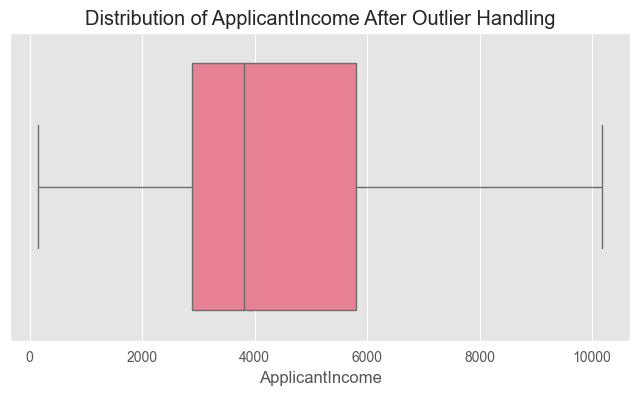


CoapplicantIncome:
Number of outliers: 18
Percentage of outliers: 2.93%


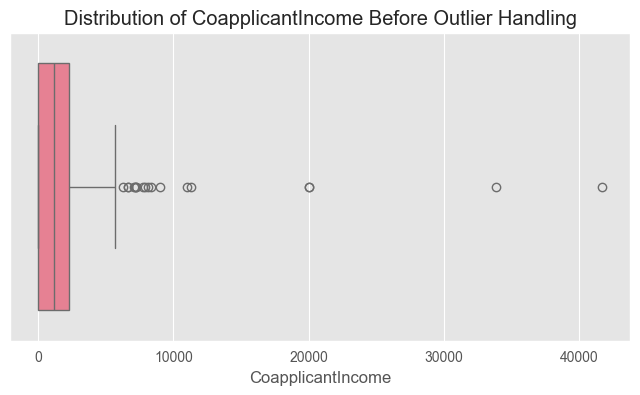

Capped CoapplicantIncome outliers to range: [-3445.88, 5743.12]


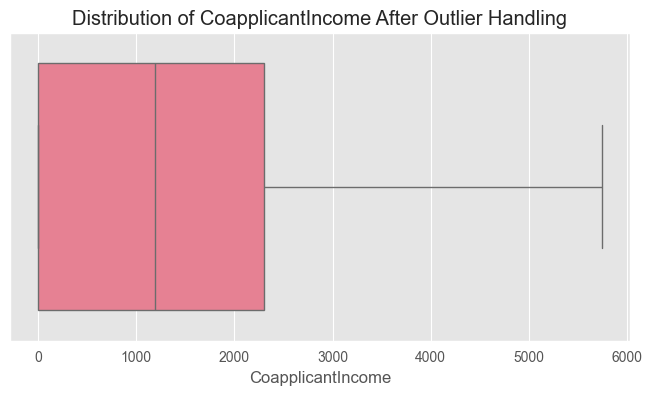


LoanAmount:
Number of outliers: 43
Percentage of outliers: 7.00%


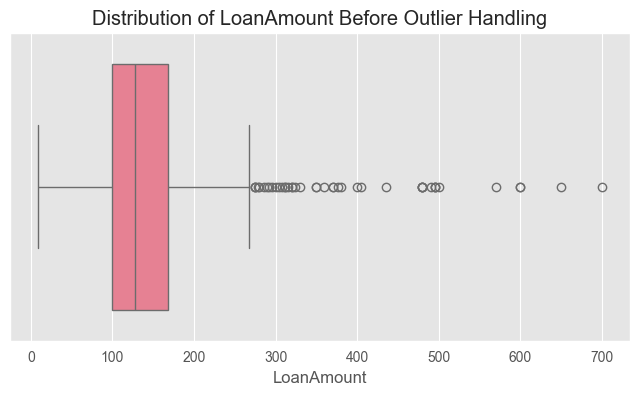

Capped LoanAmount outliers to range: [-2.00, 270.00]


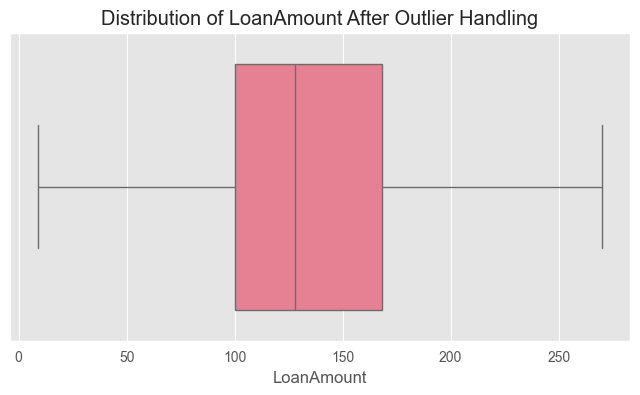

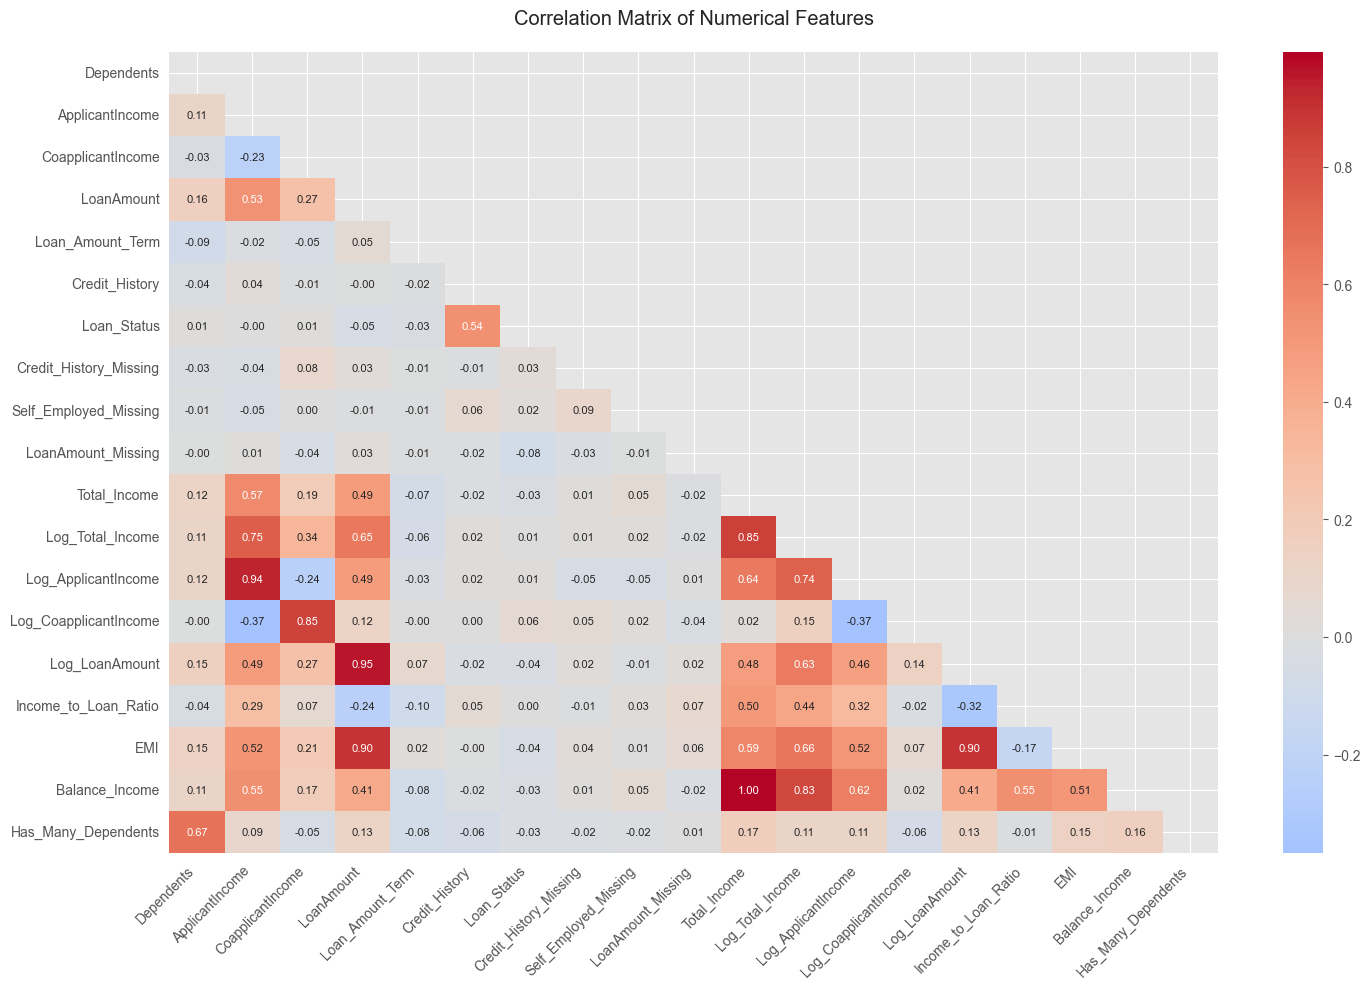


Feature Correlations with Loan Status:
Strong Positive Correlations (>0.1):
Loan_Status       1.000000
Credit_History    0.539334
Name: Loan_Status, dtype: float64

Strong Negative Correlations (<-0.1):
Series([], Name: Loan_Status, dtype: float64)

Successfully saved processed dataset to processed_train_data_final.csv
Verified saved file shape matches: (614, 24)


In [71]:
def prepare_final_dataset(data, save_path=None, handle_outliers=True):
    """
    Prepares the final dataset for modeling by handling identifier columns,
    encoding the target variable, and analyzing feature relationships.
    Now includes outlier handling using capping method.

    Args:
        data: DataFrame containing the processed loan application data
        save_path: Optional path to save the processed dataset
        handle_outliers: Boolean indicating whether to cap outliers (default True)
    """
    # Create a copy to avoid modifying the original data
    df = data.copy()

    # First, let's examine the Dependents distribution
    if 'Dependents' in df.columns:
        print("\nDependents Distribution Before Processing:")
        print(df['Dependents'].value_counts().sort_index())

        # Create a more nuanced mapping for Dependents
        dependents_mapping = {
            '0': 0,
            '1': 1,
            '2': 2,
            '3+': 3,  # We map to 3 but will create additional feature
        }

        # Apply the basic mapping
        df['Dependents'] = df['Dependents'].map(dependents_mapping)

        # Create a binary flag for '3 or more dependents'
        df['Has_Many_Dependents'] = (df['Dependents'] == 3).astype(int)

        print("\nDependents Distribution After Processing:")
        print(df['Dependents'].value_counts().sort_index())
        print("\nNumber of applications with 3+ dependents:",
              df['Has_Many_Dependents'].sum())


    # Remove non-predictive identifiers
    if 'Loan_ID' in df.columns:
        df = df.drop('Loan_ID', axis=1)
        print("Removed Loan_ID column")

    # Encode target variable with clear mapping
    target_mapping = {'Y': 1, 'N': 0}
    if 'Loan_Status' in df.columns:
        df['Loan_Status'] = df['Loan_Status'].map(target_mapping)
        print(f"Encoded Loan_Status using mapping: {target_mapping}")

    # Analyze and handle outliers for key financial features
    financial_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
    print("\nOutlier Analysis and Handling for Financial Features:")

    for feature in financial_features:
        if feature in df.columns:
            # Calculate boundaries
            Q1 = df[feature].quantile(0.25)
            Q3 = df[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Identify outliers
            outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
            print(f"\n{feature}:")
            print(f"Number of outliers: {len(outliers)}")
            print(f"Percentage of outliers: {(len(outliers)/len(df))*100:.2f}%")

            # Create boxplot before handling outliers
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[feature])
            plt.title(f'Distribution of {feature} Before Outlier Handling')
            plt.show()

            # Handle outliers if specified
            if handle_outliers:
                df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)
                print(f"Capped {feature} outliers to range: [{lower_bound:.2f}, {upper_bound:.2f}]")

                # Show distribution after handling outliers
                plt.figure(figsize=(8, 4))
                sns.boxplot(x=df[feature])
                plt.title(f'Distribution of {feature} After Outlier Handling')
                plt.show()

    # Analyze correlations with numeric features
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    correlation_matrix = df[numeric_columns].corr()

    # Visualize correlations with improved readability
    plt.figure(figsize=(15, 10))
    mask = np.triu(np.ones_like(correlation_matrix))
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='coolwarm',
                center=0,
                fmt='.2f',
                mask=mask,
                annot_kws={'size': 8})
    plt.title('Correlation Matrix of Numerical Features', pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Analyze and display feature importance based on correlation
    if 'Loan_Status' in df.columns:
        target_correlations = correlation_matrix['Loan_Status'].sort_values(ascending=False)
        print("\nFeature Correlations with Loan Status:")
        print("Strong Positive Correlations (>0.1):")
        print(target_correlations[target_correlations > 0.1])
        print("\nStrong Negative Correlations (<-0.1):")
        print(target_correlations[target_correlations < -0.1])

    # Save processed dataset with validation
    if save_path:
        try:
            df.to_csv(save_path, index=False)
            print(f"\nSuccessfully saved processed dataset to {save_path}")

            # Verify the save was successful
            saved_shape = pd.read_csv(save_path).shape
            if saved_shape == df.shape:
                print(f"Verified saved file shape matches: {saved_shape}")
            else:
                print("Warning: Saved file shape doesn't match original")
        except Exception as e:
            print(f"Error saving file: {e}")

    return df

# Apply the improved function
train_final = prepare_final_dataset(
    train_processed,
    save_path='processed_train_data_final.csv',
    handle_outliers=True  # Set to False if you want to keep outliers
)